# 07. 예측모델 실습

예측 모델의 정확도를 높이기 위해 어떠한 방법을 사용하는지 확인해봅니다.

* **분석데이터**:
  https://www.kaggle.com/c/bike-sharing-demand

## Step1. LinearRegressor를 사용하여 분류기 만들기

### 데이터 클렌징 및 가공

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

bike_df = pd.read_csv('./dataset/bike_sharing_demand_train.csv')
bike_df.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


**Data Fields**

- datetime - 대여날짜 및 시간 
- season - 계절 (1 = 봄, 2 = 여름, 3 = 가을, 4 = 겨울 ) 
- holiday - 휴일 
- workingday - 주말과 휴일을 제외한 날 (평일) 
- weather - 날씨 * 1: 맑음, 대체로 흐림, 일부 흐림 * 2: 안개 + 흐림, 안개 + 깨진 구름, 안개 + 구름이 거의 없음, 안개 * 3: 가벼운 눈, 가벼운 비 + 뇌우 + 흩어진 구름, 가벼운 비 + 흩어진 구름 * 4: 폭우 + 얼음 팔레트 + 뇌우 + 안개, 눈 + 안개 
- temp - 섭씨 온도 
- atemp - 체감 온도 
- humidity - 상대 습도 
- windspeed - 풍속 
- casual - 미등록 사용자의 대여 횟수 
- registered - 등록된 사용자의 대여 횟수 
- count - 총 대여수

### [Q1] 분석할 데이터는 몇 개의 feature, 몇 개의 데이터로 구성되어 있습니까?

In [32]:
#[Q1]을 해결하기 위한 코드를 작성하세요
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


### [Q2] bike_df의 데이터 중 숫자가 아닌 데이터가 포함된 필드가 있습니까?

In [33]:
#[Q2]을 해결하기 위한 코드를 작성하세요
bike_df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

### [Q3]'datetime'에 있는 값을 'year', 'month', 'day', 'hour' 필드에 파싱하여 넣어주세요.
예)
2011-01-01 00:00:00 -> 2011	1	1	0

(힌트)
python의 'datetime64' 포맷을 활용해보세요

In [34]:
df=bike_df

In [35]:
#[Q3]을 해결하기 위한 코드를 작성하세요
# 시간정보 분류
df['datetime'] = df['datetime'].astype('datetime64')
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour

### [Q4] 각 데이터 필드의 값을 확인하시고, 불필요한 필드는 제거해주세요

(힌트)
dataframe의 drop()

In [36]:
#[Q4]을 해결하기 위한 코드를 작성하세요

In [37]:
drop_columns = ['datetime','casual','registered']
df.drop(drop_columns, axis=1, inplace=True)
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,4


In [38]:
df.dtypes

season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
count           int64
year            int64
month           int64
day             int64
hour            int64
dtype: object

### [Q5] 모델을 만들기 위해 train set과 test set으로 분리해주세요.
 1) 종속변수y 에 해당하는 값을 Y로 할당    
 2) 독립변수x 에 해당하는 값을 X로 할당  
 3) train_test_split 함수를 사용해서 분리(train:test = 7:3, random_state=0)

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X=df[df.columns.difference(['count'])]
# X=df.drop(['count'], axis=1, inplace=False)
y=df['count']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

### [Q6] LinearRegression을 사용하여 예측하는 모델을 학습시킵니다.

In [41]:
#[Q6]을 해결하기 위한 코드를 작성하세요
lr = LinearRegression()
lr.fit(X_train ,y_train )

LinearRegression()

### [Q7] 모델을 사용하여 테스트 셋으로 분리한 값(X_test)의 예측값을 구합니다.

In [11]:
#[Q7]을 해결하기 위한 코드를 작성하세요
y_preds = lr.predict(X_test)

In [12]:
print('bias:', lr.intercept_)
print('weight:', lr.coef_)

bias: -5.9401372709544376e-12
weight: [ 2.06350371e-14  1.00000000e+00  1.13234075e-15 -1.15250047e-14
 -1.47833135e-14  2.58126853e-15 -3.53883589e-15  1.00000000e+00
  3.97945565e-15 -1.16573418e-15 -1.44328993e-15  5.18682319e-16
 -5.64462756e-16  2.89547032e-15]


In [13]:
df.head(2)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1


In [14]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. index가 컬럼명에 유의
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X.columns )
coeff.sort_values(ascending=False)

casual        1.0
registered    1.0
atemp         0.0
day           0.0
holiday      -0.0
hour         -0.0
humidity      0.0
month        -0.0
season        0.0
temp         -0.0
weather      -0.0
windspeed     0.0
workingday   -0.0
year          0.0
dtype: float64

### [Q8] 모델의 정확도를 측정합니다. 
이 대회에서 정확도 평가는 RMSLE(Root Mean Squared Log Error)입니다. RMSLE는 아래 함수를 사용하세요

In [15]:
def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    print('RMSLE: {0:.4f}'.format(rmsle))
    return rmsle

In [16]:
#[Q8]을 해결하기 위한 코드를 작성하세요
rmsle(y_test, y_preds)

RMSLE: 0.0000


3.154826400738515e-14

In [17]:
origin = y_test.reset_index(drop=True)
origin

0       244
1       239
2       229
3       467
4       335
       ... 
3261      5
3262     12
3263     74
3264     62
3265    172
Name: count, Length: 3266, dtype: int64

In [18]:
preds = pd.DataFrame(y_preds)
compare = pd.merge(origin, preds, on=origin.index, how='right')
del compare['key_0']

compare.columns = ['origin', 'preds']
compare 

,origin,preds
0,244,244.0
1,239,239.0
2,229,229.0
3,467,467.0
4,335,335.0
...,...,...
3261,5,5.0
3262,12,12.0
3263,74,74.0
3264,62,62.0


## Step2. 모델 성능 개선하기

### [Q1] 예측값과 실제값의 차이가 가장 많이 나는 데이터 5개 출력
아래 함수를 실행시켜 보세요

In [19]:
def get_top5_error_data(y_test, pred):
    # DataFrame에 컬럼들로 실제 대여횟수(count)와 예측 값을 서로 비교 할 수 있도록 생성. 
    result_df = pd.DataFrame(y_test.values, columns=['real_count'])
    result_df['predicted_count']= np.round(pred)
    result_df['diff'] = np.abs(result_df['real_count'] - result_df['predicted_count'])
    # 예측값과 실제값이 가장 큰 데이터 순으로 출력. 
    print(result_df.sort_values('diff', ascending=False)[:5])

In [20]:
#[Q1]을 해결하기 위한 코드를 작성하세요
get_top5_error_data(y_test, y_preds)

      real_count  predicted_count  diff
0            244            244.0   0.0
2181         311            311.0   0.0
2171         213            213.0   0.0
2172           7              7.0   0.0
2173         340            340.0   0.0


### [Q2] Y값 분포 시각화하기

(힌트) 히스토그램을 그려보세요.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

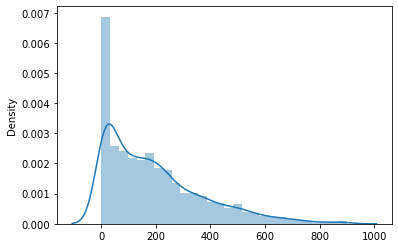

In [21]:
#[Q2]을 해결하기 위한 코드를 작성하세요
sns.distplot(x=y_preds)

### [Q3] Y의 로그값 분포 시각화하기

(힌트) 히스토그램을 그려보세요.  
(힌트) 로그변환: numpy의 log1p() 함수


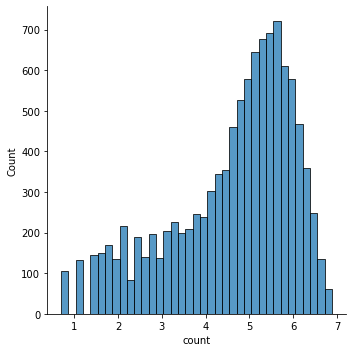

In [22]:
#[Q3]을 해결하기 위한 코드를 작성하세요
sns.displot(x=np.log1p(y))

### [Q4] Y의 로그값을 사용하여 모델 만들어보기

* 모델 학습, 예측, 평가는 get_model_predict()를 이용하세요.

In [23]:
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1 :
        # 테스트 데이터 셋의 Target 값은 Log 변환되었으므로 다시 expm1를 이용하여 원래 scale로 변환
        y_test = np.expm1(y_test)
        # 예측 값 역시 Log 변환된 타겟 기반으로 학습되어 예측되었으므로 다시 exmpl으로 scale변환
        pred = np.expm1(pred)
    print('###',model.__class__.__name__,'###')
    rmsle(y_test, pred)

In [24]:
#[Q4]을 해결하기 위한 코드를 작성하세요


### [Q5] 선형회귀모델에서 가장 영향을 많이 주는 종속변수 알아보기
아래 함수를 실행시키세요

In [25]:
def plotFeatureList(model, X):
    coef = pd.Series(model.coef_, index=X.columns)
    coef_sort = coef.sort_values(ascending=False)
    sns.barplot(x=coef_sort.values, y=coef_sort.index)

In [26]:
#[Q5]을 해결하기 위한 코드를 작성하세요


### [Q6] 수치형 데이터 중 카테고리형 데이터 One Hot Encoding 하기

In [27]:
#[Q6]을 해결하기 위한 코드를 작성하세요


### [Q7] One Hot Encoding 적용된 feature 데이터 세트 기반으로 학습/예측 

 * 데이터 분할
 * 학습: LinearRegression, RandomForestRegressor, GradientBoostingRegressor, XGBRegressor, LGBMRegressor
 * 예측
 * 평가

In [28]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [29]:
#[Q7]을 해결하기 위한 코드를 작성하세요


# 정규화

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df)
scaled_array = scaler.transform(df)

scaled_df = pd.DataFrame(data=scaled_array, columns=df.columns)
scaled_df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
count,1.088600e+04,1.088600e+04,1.088600e+04,1.088600e+04,1.088600e+04,1.088600e+04,1.088600e+04,1.088600e+04,1.088600e+04,1.088600e+04,1.088600e+04,1.088600e+04,1.088600e+04,1.088600e+04,1.088600e+04
mean,2.709128e-14,-1.851822e-15,-6.857560e-16,2.403899e-15,1.036139e-14,-3.990153e-15,-1.667583e-15,-6.407188e-16,-7.099369e-16,1.715129e-15,1.117005e-15,1.899444e-13,5.617814e-16,5.042611e-16,1.134088e-17
std,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00
min,-1.349864e+00,-1.714905e-01,-1.460672e+00,-6.601784e-01,-2.491372e+00,-2.701736e+00,-3.215858e+00,-1.567754e+00,-7.210421e-01,-1.029928e+00,-1.052104e+00,-1.003866e+00,-1.603121e+00,-1.642070e+00,-1.668944e+00
25%,-4.539052e-01,-1.714905e-01,-1.460672e+00,-6.601784e-01,-8.074281e-01,-8.248654e-01,-7.735577e-01,-7.101642e-01,-6.409752e-01,-7.915680e-01,-8.257554e-01,-1.003866e+00,-7.320958e-01,-9.116571e-01,-8.013299e-01
50%,4.420534e-01,-1.714905e-01,6.846162e-01,-6.601784e-01,3.454398e-02,6.902305e-02,5.899992e-03,2.432639e-02,-3.807575e-01,-2.486371e-01,-2.571223e-01,9.961492e-01,1.389299e-01,1.358704e-03,6.628379e-02
75%,1.338012e+00,-1.714905e-01,6.846162e-01,9.175828e-01,7.712696e-01,8.738177e-01,7.853577e-01,5.142603e-01,2.597782e-01,4.399583e-01,5.102564e-01,9.961492e-01,1.009956e+00,9.143745e-01,9.338975e-01
max,1.338012e+00,5.831228e+00,6.846162e-01,4.073105e+00,2.665707e+00,2.572501e+00,1.980526e+00,5.413599e+00,6.625102e+00,4.836375e+00,4.336108e+00,9.961492e-01,1.590639e+00,1.644787e+00,1.656909e+00
